<a href="https://colab.research.google.com/github/DilakshanRahul12/CM2604/blob/main/EDA_Bank_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/CM2604/dataset/bank/bank-full.csv'

In [ ]:
df = pd.read_csv(dataset, delimiter=';') # Use correct delimiter
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


## Data Overview

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [ ]:
print(df.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [ ]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


As per the .txt no null/missing

In [ ]:
for col in df.columns:
    print(f"---{col}---")
    print(df[col].value_counts())

---age---
age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64
---job---
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
---marital---
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
---education---
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
---default---
default
no     44396
yes      815
Name: count, dtype: int64
---balance---
balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: count, Length: 7168, dtype

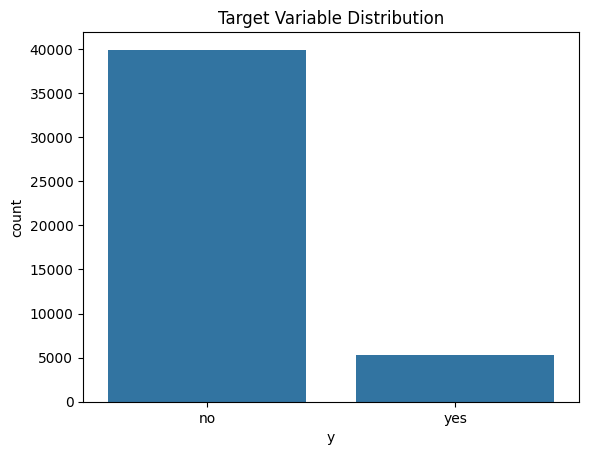

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution')
plt.show()

# Percentage distribution
print(df['y'].value_counts(normalize=True) * 100)


## Numeric

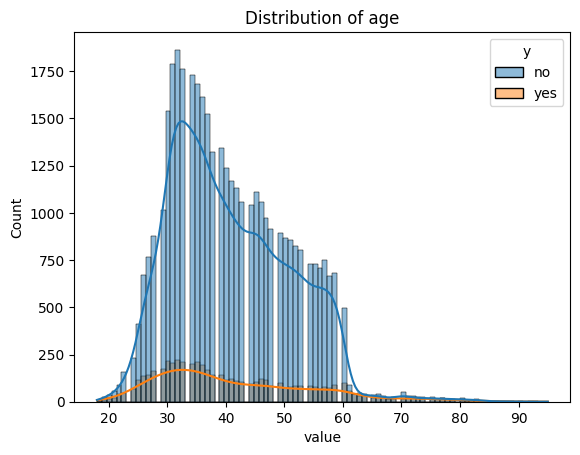

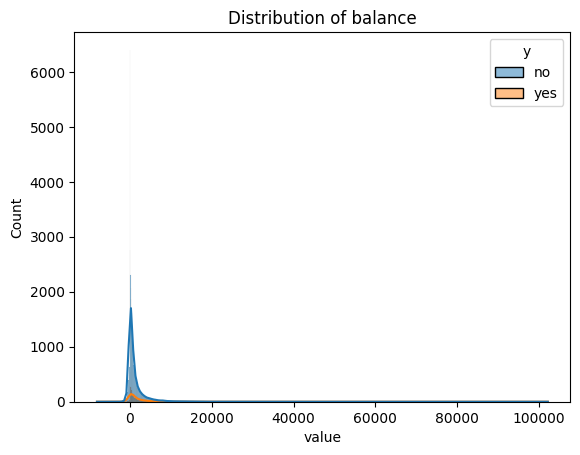

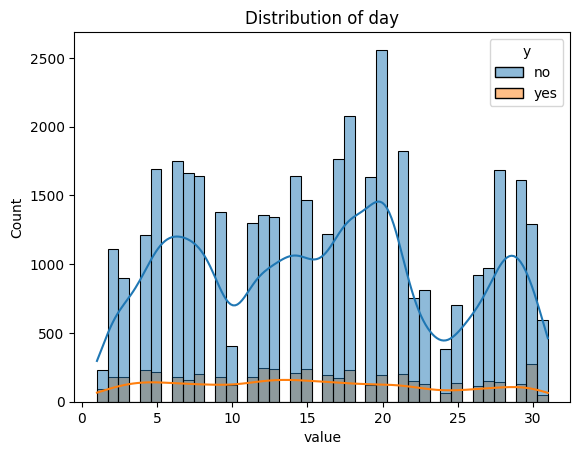

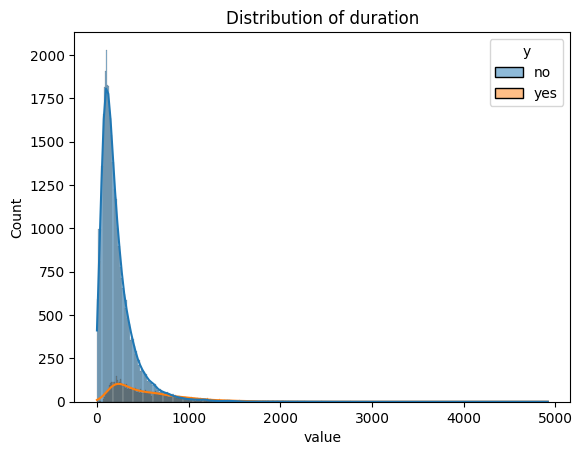

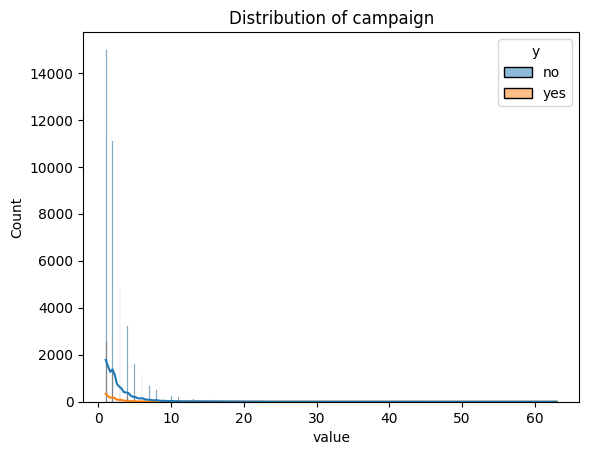

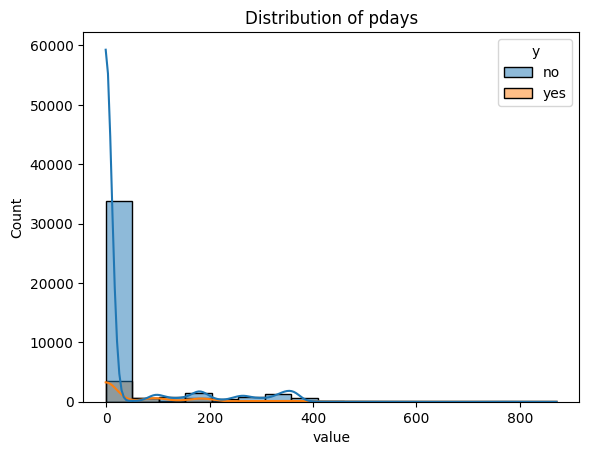

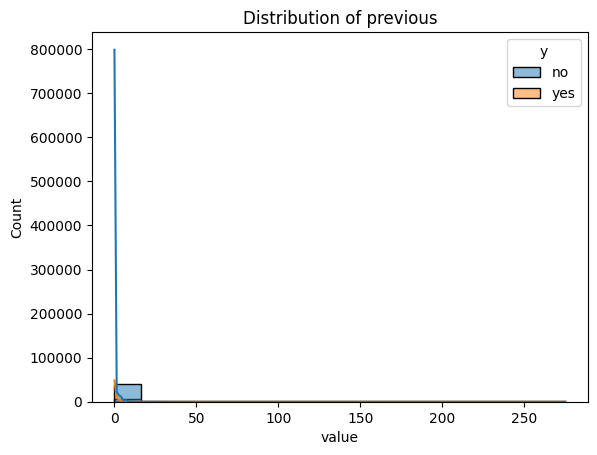

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    # Melt the dataframe to convert it to long-form
    df_melted = pd.melt(df, id_vars=['y'], value_vars=[col])  # 'y' is the hue column

    # Now use the melted dataframe for histplot
    sns.histplot(data=df_melted, x='value', hue='y', kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Categorial

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


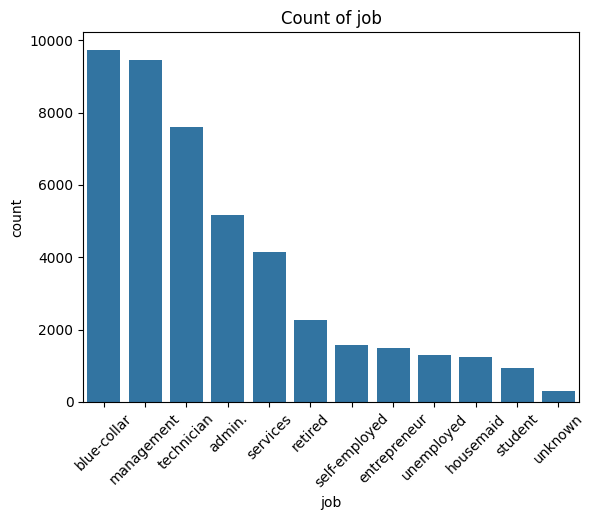

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


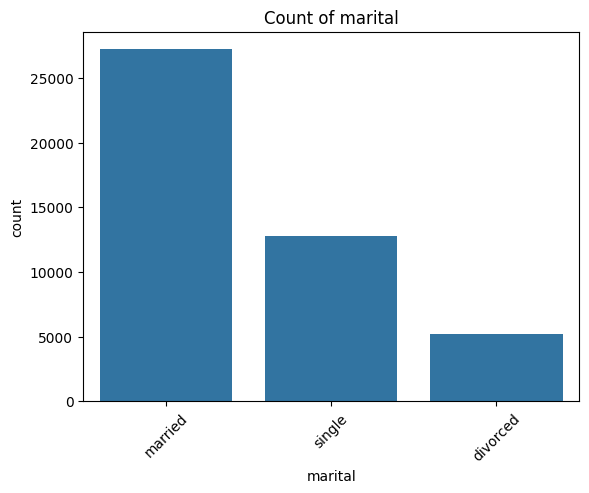

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


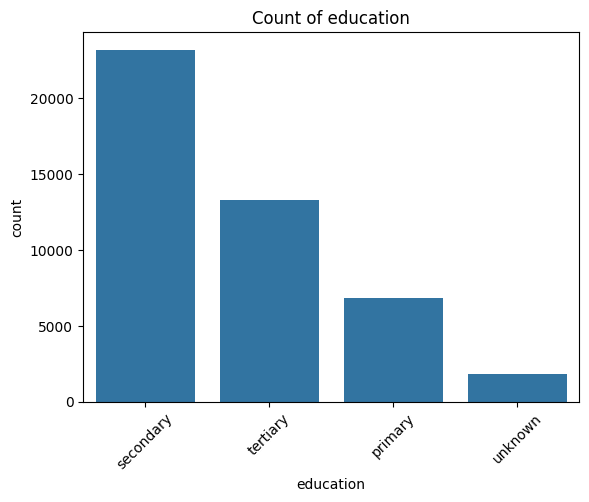

default
no     44396
yes      815
Name: count, dtype: int64


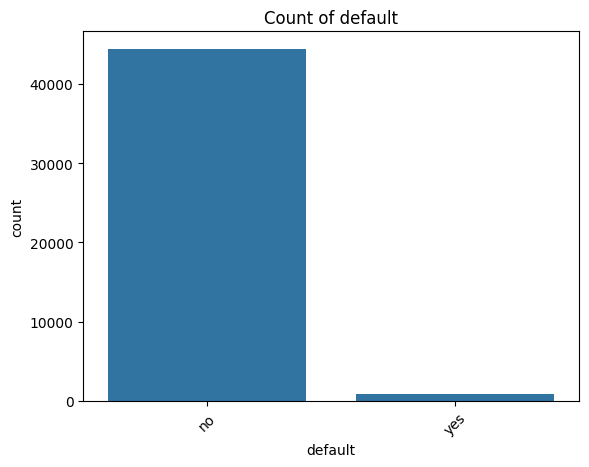

housing
yes    25130
no     20081
Name: count, dtype: int64


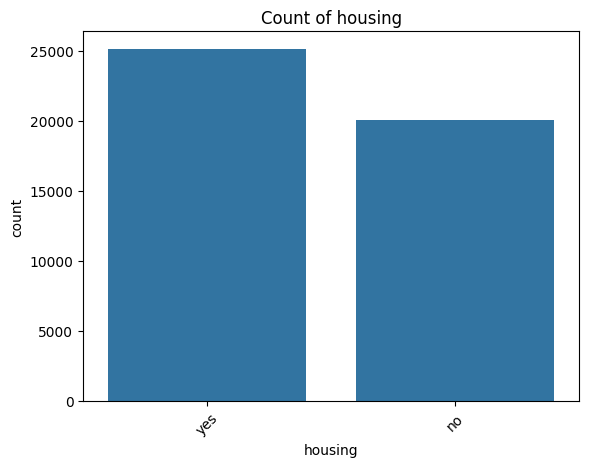

loan
no     37967
yes     7244
Name: count, dtype: int64


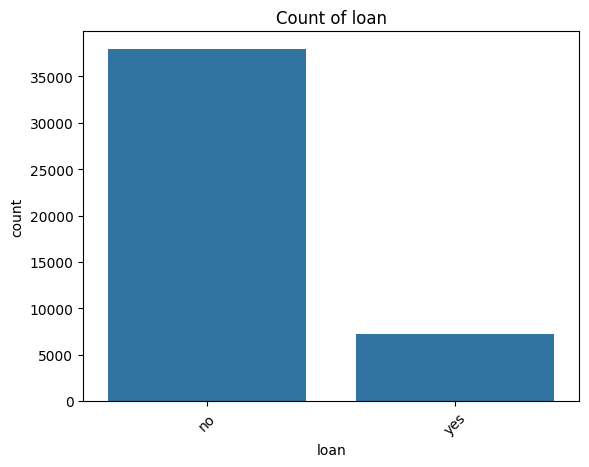

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


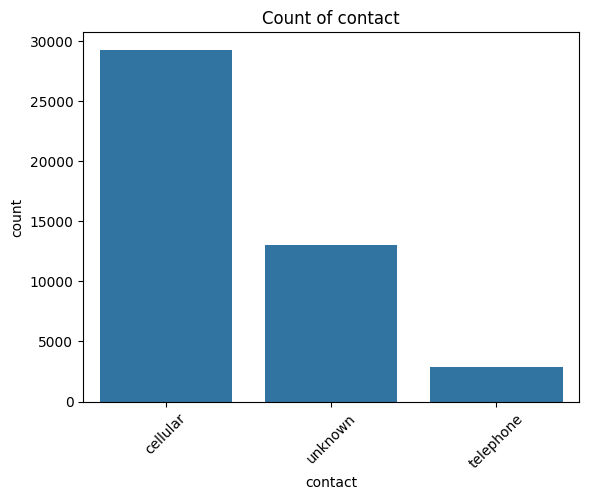

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


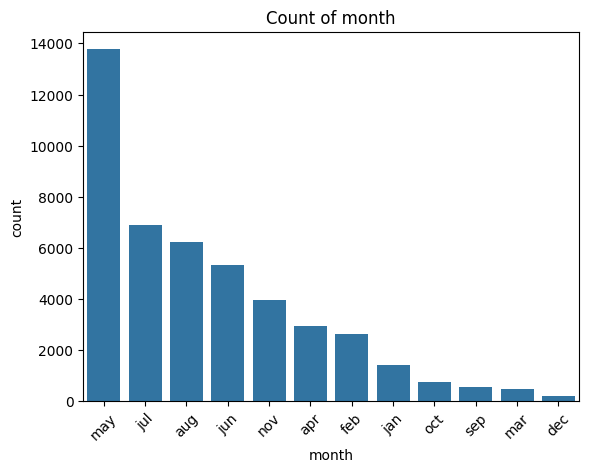

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


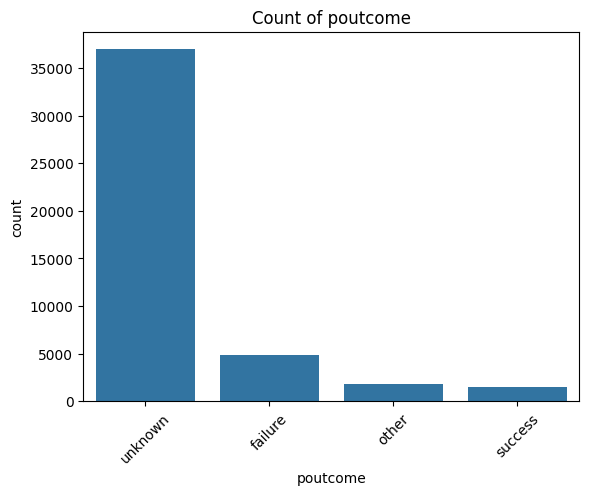

y
no     39922
yes     5289
Name: count, dtype: int64


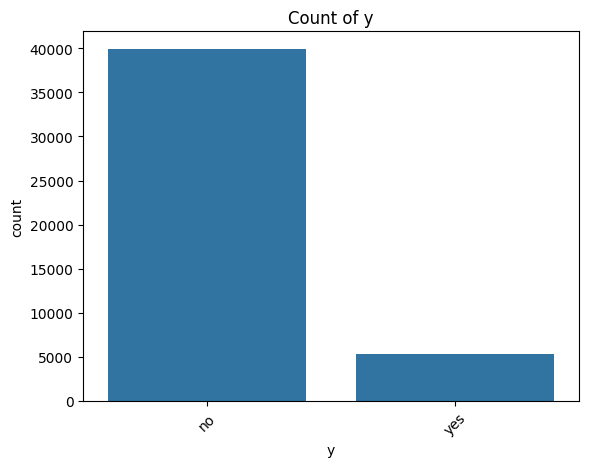

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(df[col].value_counts())
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

### Numerical vs. Target

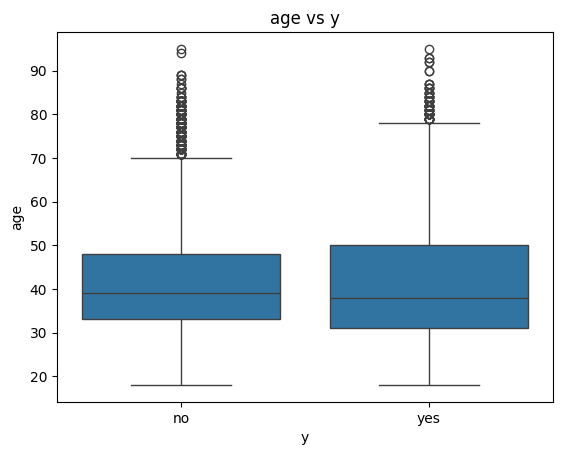

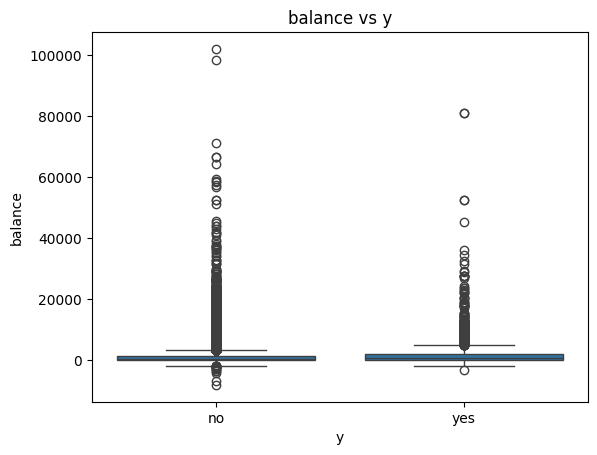

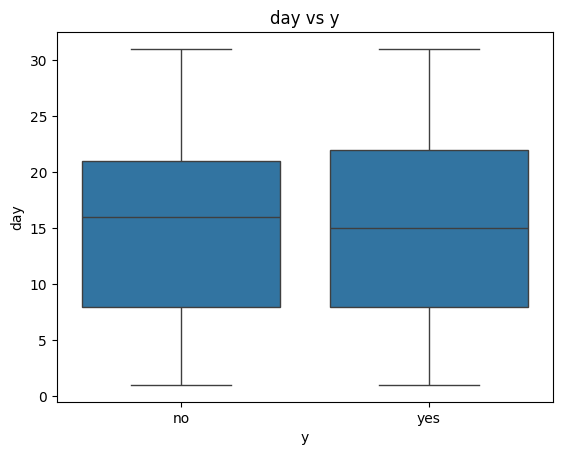

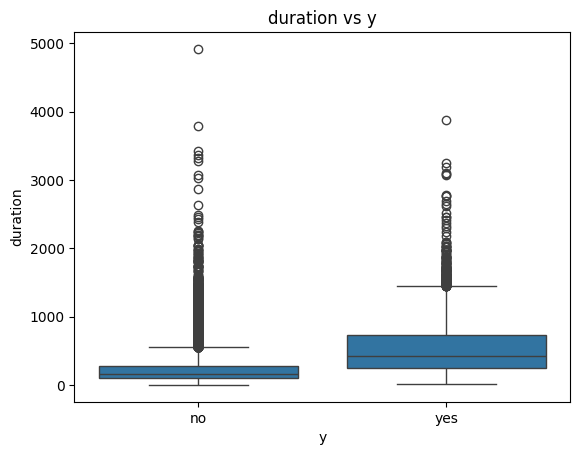

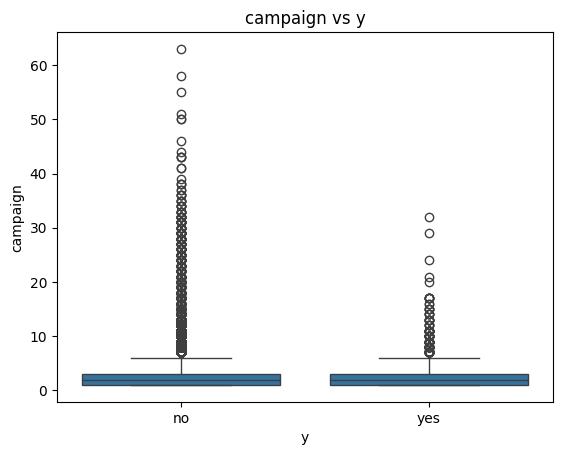

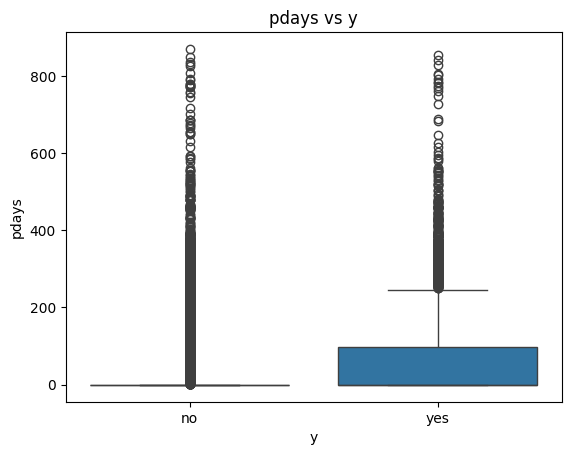

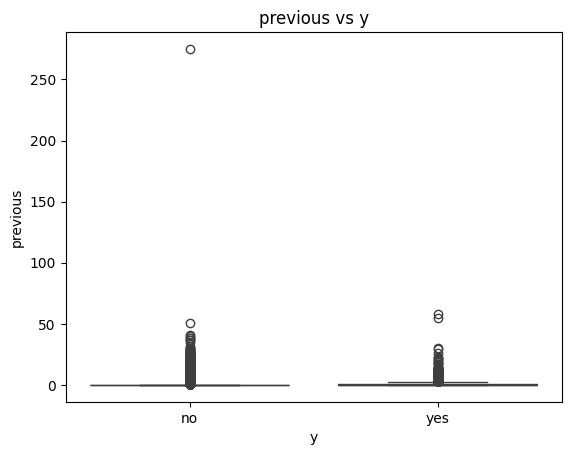

In [ ]:
for col in numeric_cols:
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'{col} vs y')
    plt.show()


### Categorical vs. Target

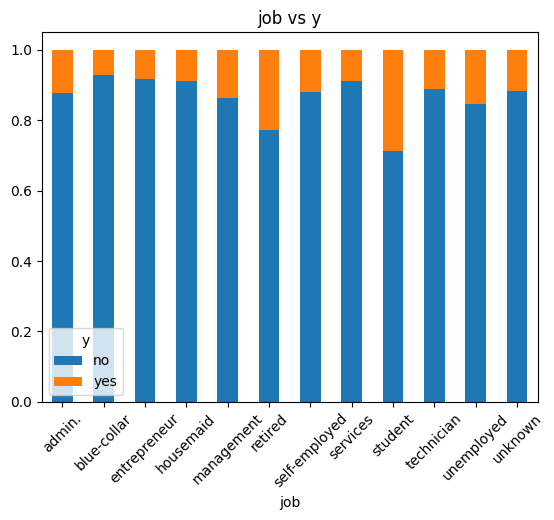

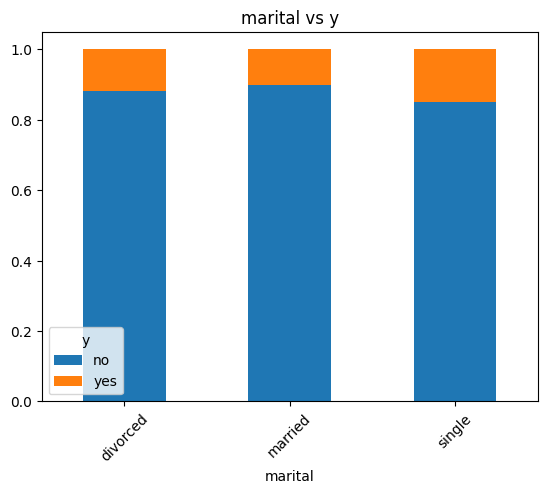

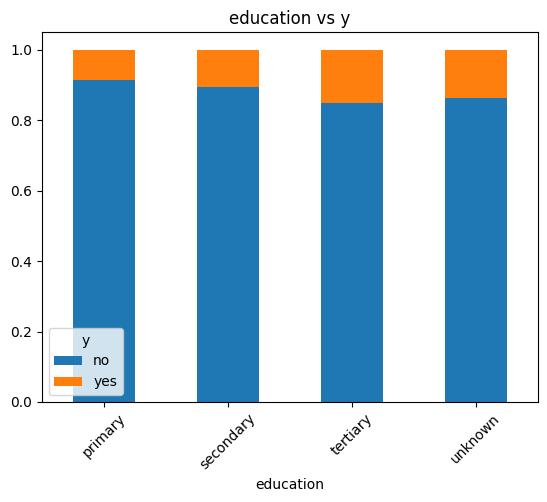

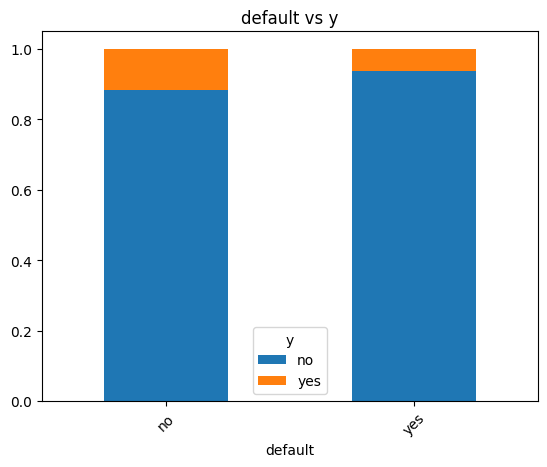

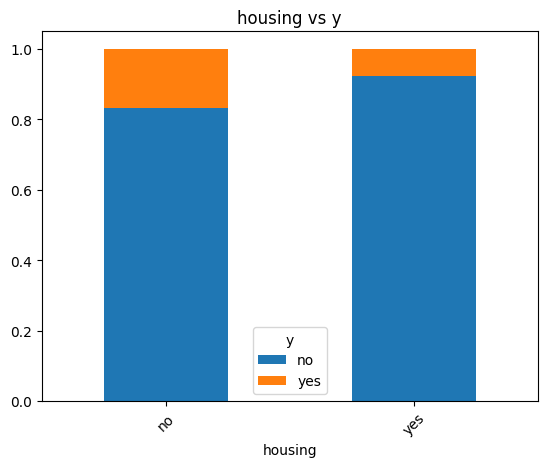

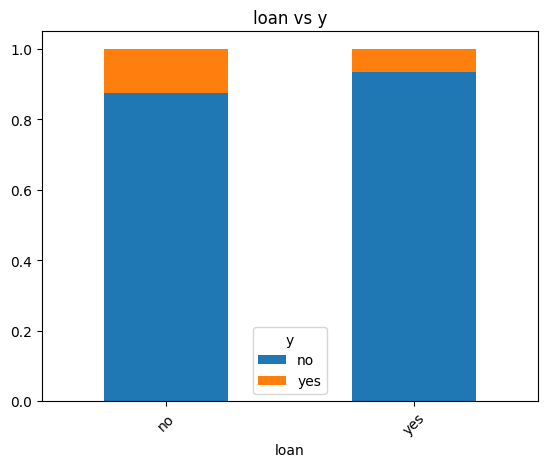

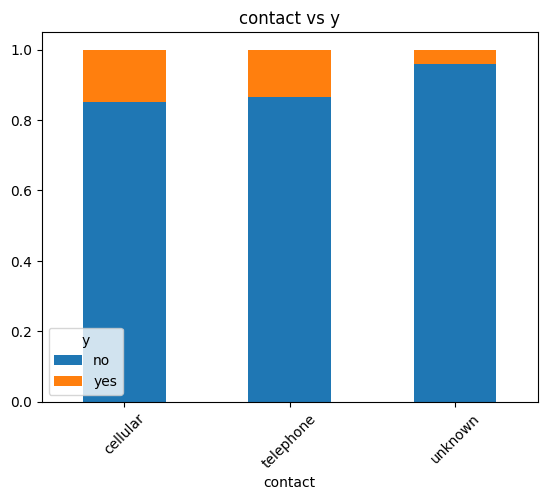

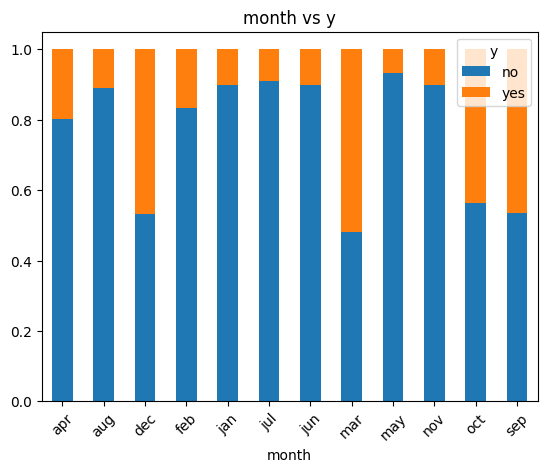

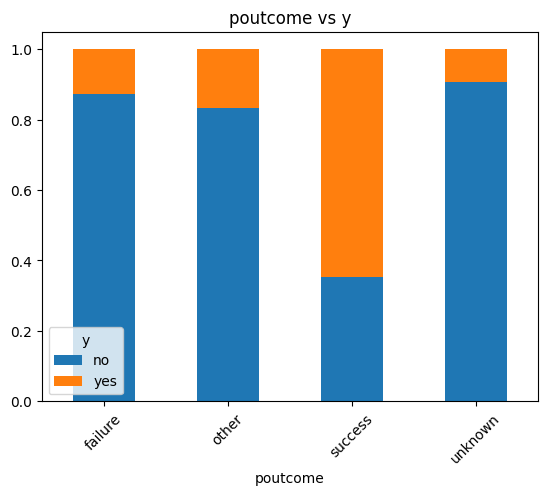

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  if col != 'y':
    pd.crosstab(df[col], df['y'], normalize='index').plot(kind='bar', stacked=True)
    plt.title(f'{col} vs y')
    plt.xticks(rotation=45)
    plt.show()

### CORR

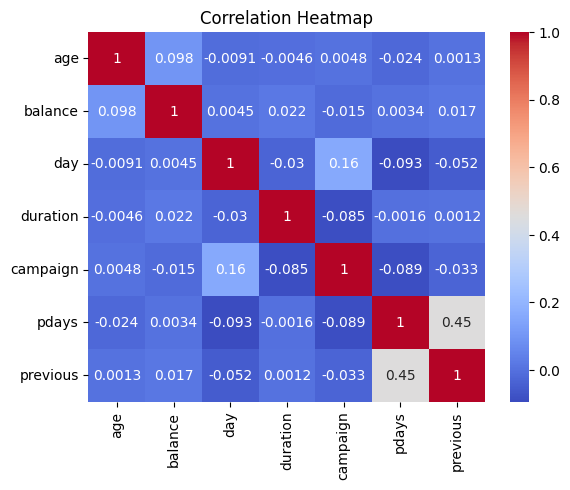

In [ ]:
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

 ### x

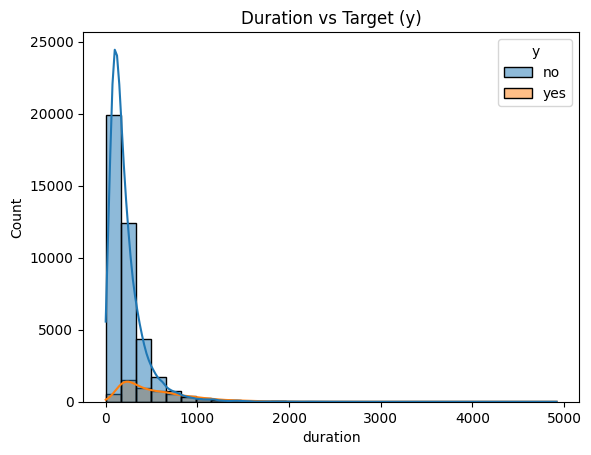

In [ ]:
sns.histplot(df, x='duration', hue='y', kde=True, bins=30)
plt.title('Duration vs Target (y)')
plt.show()


<Axes: xlabel='job'>

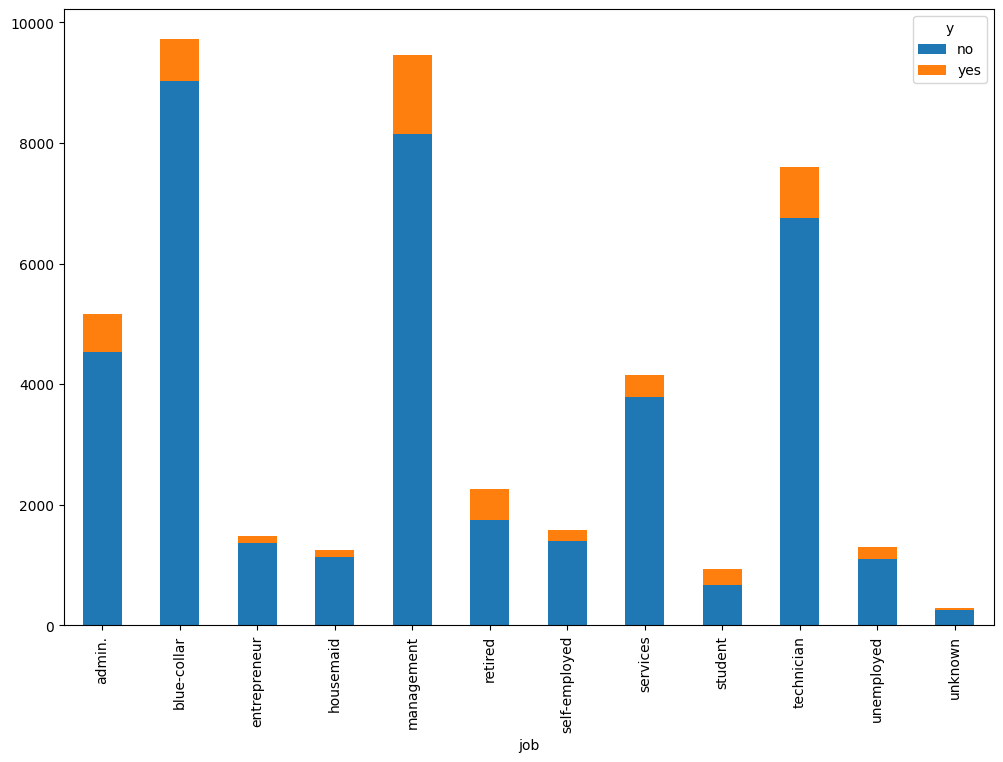

In [ ]:
pd.crosstab(df['job'], df['y']).plot(kind='bar', stacked=True, figsize=(12, 8))
